### Importing required libraries 

In [16]:
import numpy as np
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix
import pandas as pd

### Fetching MAANG Stock Data 

In [17]:
maang_symbols = ['AAPL', 'AMZN', 'GOOGL', 'NFLX', 'META']

start_date = '2022-01-01'
end_date = '2023-11-01'
maang_data = yf.download(maang_symbols, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  5 of 5 completed


### Downloading summary information for each stock

In [18]:
maang_info = {symbol: yf.Ticker(symbol).info for symbol in maang_symbols}
market_cap_values = {symbol: info.get('marketCap', 0) for symbol, info in maang_info.items()}
market_cap_df = pd.DataFrame(list(market_cap_values.items()), columns=['Symbol', 'Market Cap'])
maang_returns = maang_data.pct_change()
maang_cum_returns = (1 + maang_returns).cumprod() - 1

### Market Cap pie chart

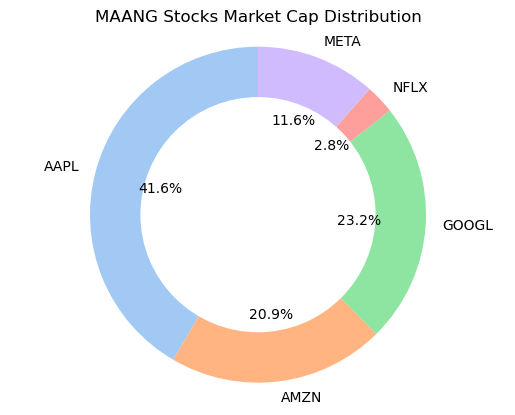

In [19]:
fig, ax = plt.subplots()
ax.pie(market_cap_df['Market Cap'], labels=market_cap_df['Symbol'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('MAANG Stocks Market Cap Distribution')

plt.show()

### Daily returns of each stocks

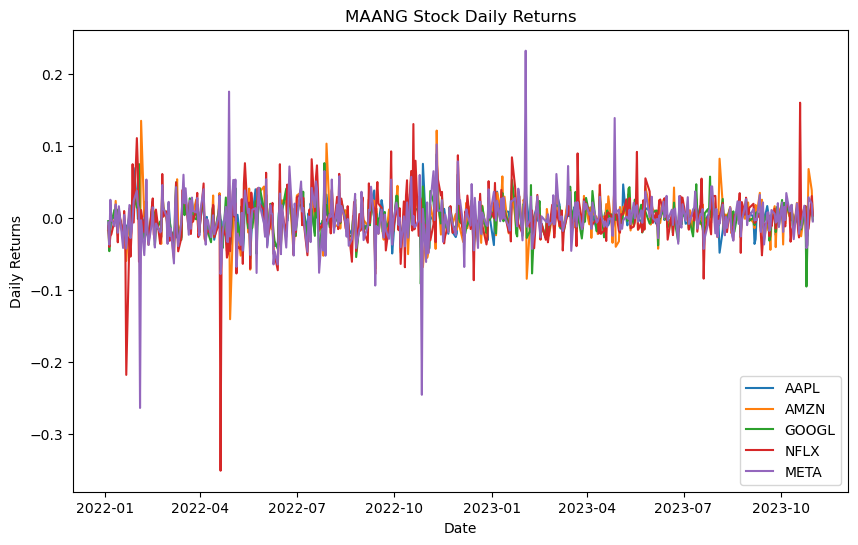

In [20]:
plt.figure(figsize=(10, 6))

for symbol in maang_symbols:
    plt.plot(maang_data.index, maang_data[symbol].pct_change(), label=symbol)

plt.title('MAANG Stock Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


### Closing prices 

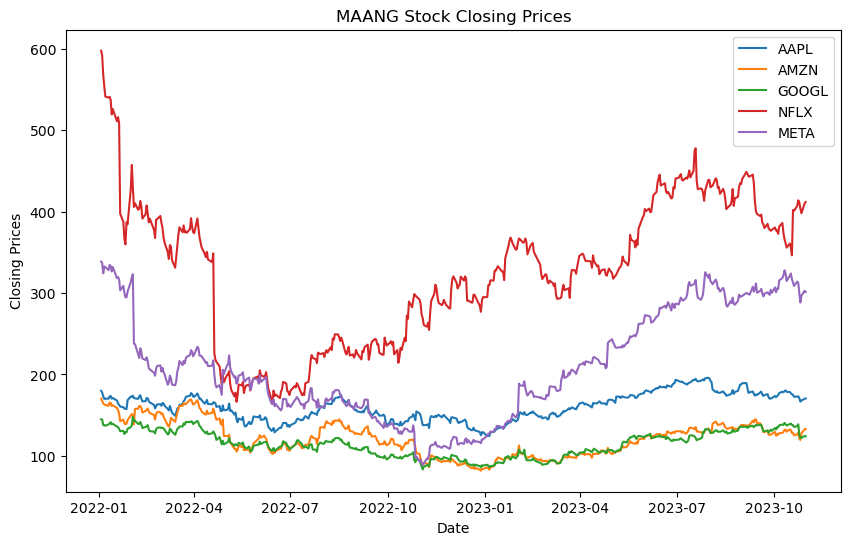

In [21]:
plt.figure(figsize=(10, 6))

for symbol in maang_symbols:
    plt.plot(maang_data.index, maang_data[symbol], label=symbol)

plt.title('MAANG Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

### Cumulative returns

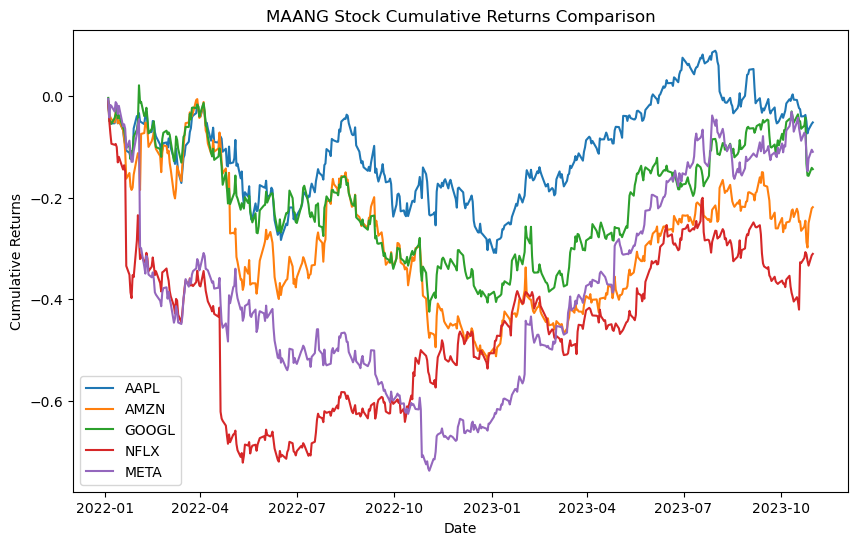

In [22]:
plt.figure(figsize=(10, 6))
for symbol in maang_symbols:
    plt.plot(maang_data.index, maang_cum_returns[symbol], label=symbol)

plt.title('MAANG Stock Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

### Stocks volatility 

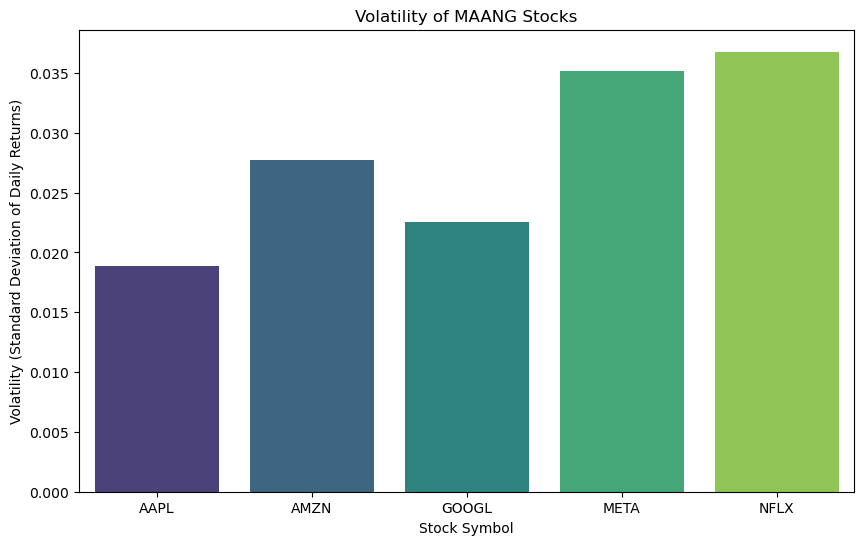

In [23]:
maang_volatility = maang_returns.std()

plt.figure(figsize=(10, 6))
sns.barplot(x=maang_volatility.index, y=maang_volatility.values, palette='viridis')
plt.title('Volatility of MAANG Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.show()

### Correlation heatmap

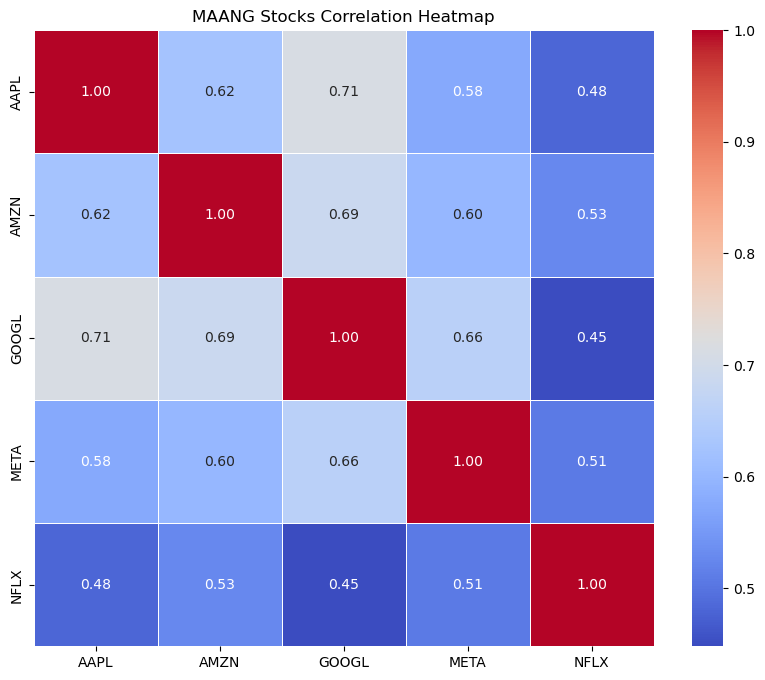

In [24]:

correlation_matrix = maang_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('MAANG Stocks Correlation Heatmap')
plt.show()

### Scatter matrix plot

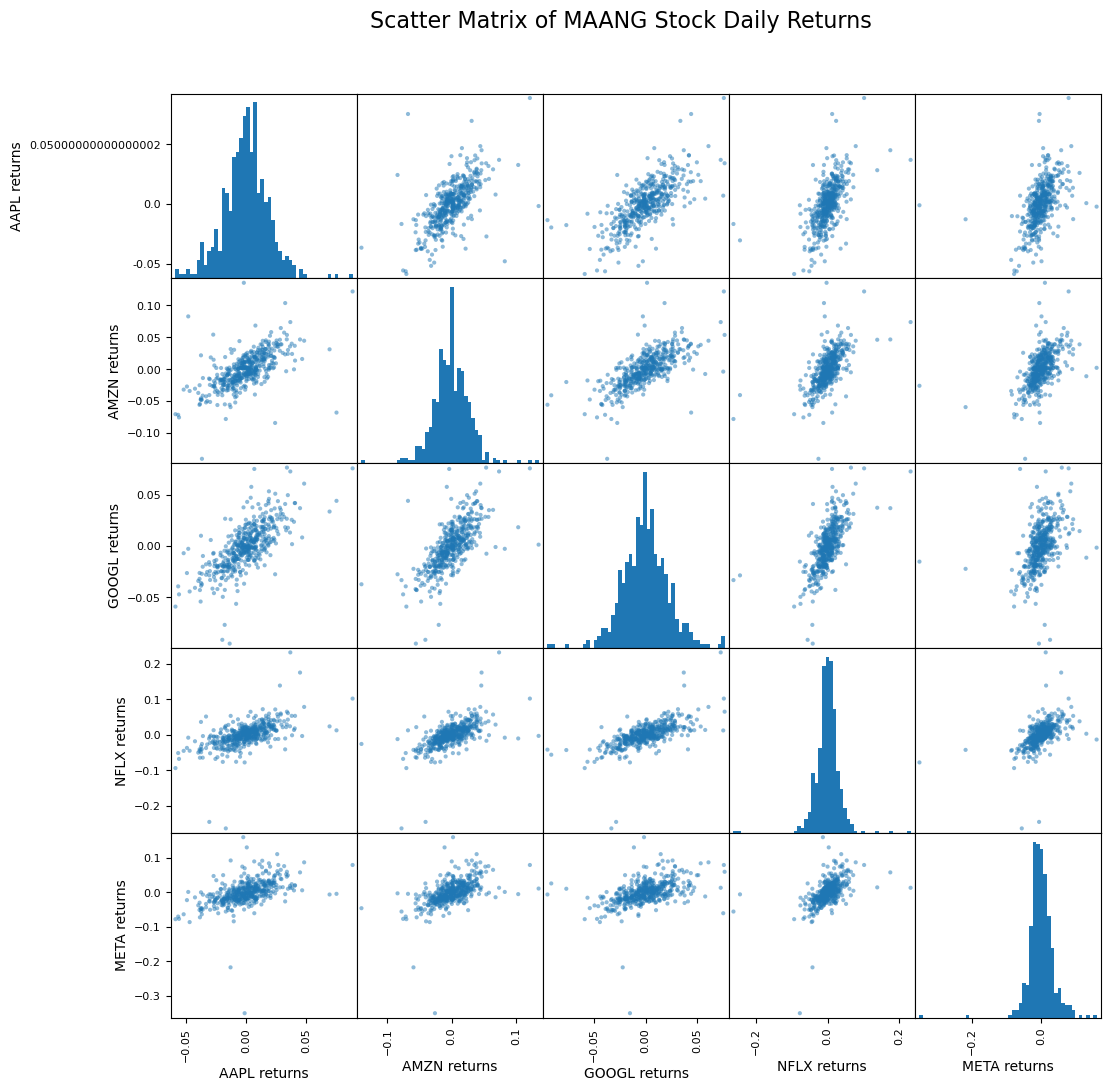

In [25]:
maang_returns = maang_data.pct_change()

returns_df = pd.DataFrame(maang_returns)
returns_df.columns = [f'{symbol} returns' for symbol in maang_symbols]

scatter_matrix(returns_df, figsize=(12, 12), hist_kwds={'bins': 50}, alpha=0.5, diagonal='hist')
plt.suptitle('Scatter Matrix of MAANG Stock Daily Returns', y=0.95, fontsize=16)
plt.show()

### Market Cap vs Daily Return

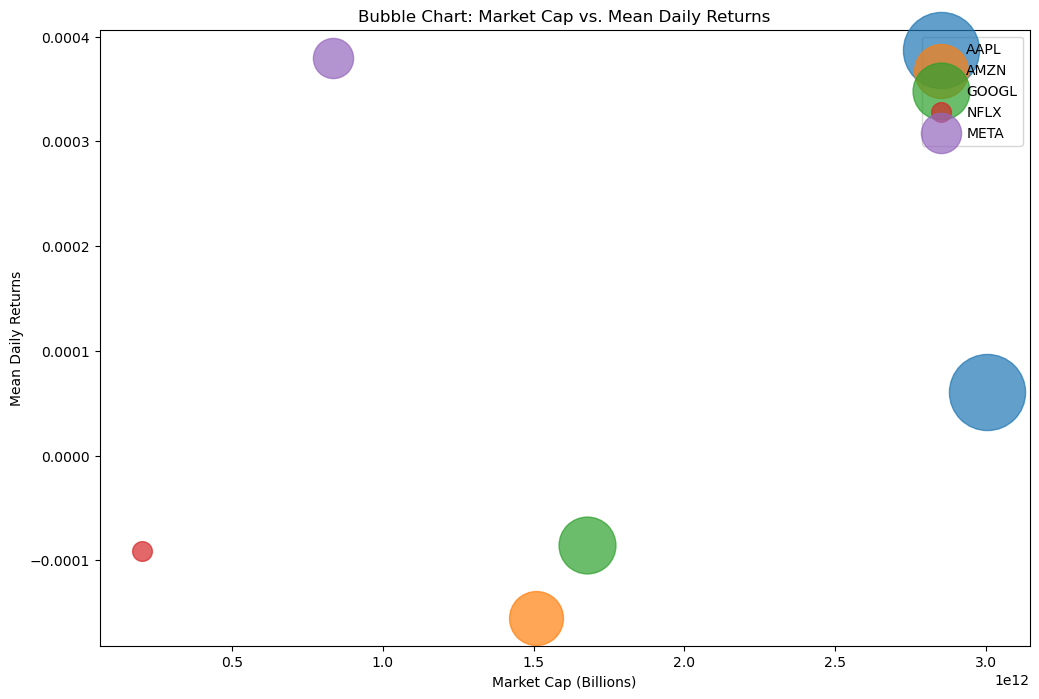

In [26]:
plt.figure(figsize=(12, 8))
for symbol in maang_symbols:
    plt.scatter(market_cap_values[symbol], maang_returns[symbol].mean(), s=market_cap_values[symbol] / 1e9, label=symbol, alpha=0.7)

plt.title('Bubble Chart: Market Cap vs. Mean Daily Returns')
plt.xlabel('Market Cap (Billions)')
plt.ylabel('Mean Daily Returns')
plt.legend()
plt.show()

### Market Cap vs Cumalative Returns

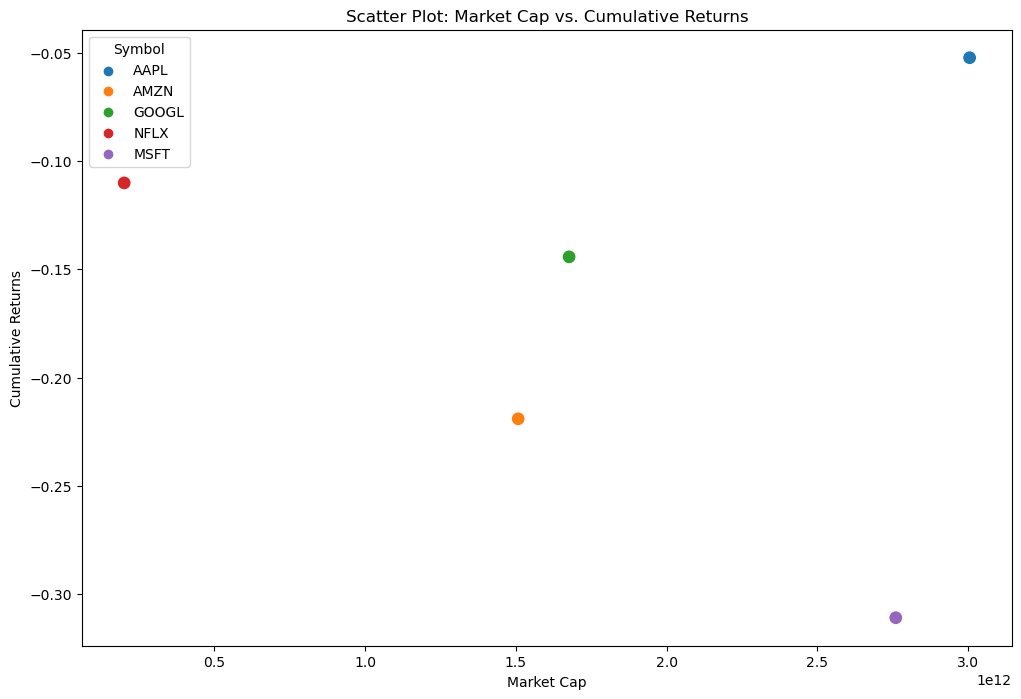

In [27]:
maang_symbols = ['AAPL', 'AMZN', 'GOOGL', 'NFLX', 'MSFT']

maang_market_cap = {symbol: yf.Ticker(symbol).info.get('marketCap', 0) for symbol in maang_symbols}

market_cap_df = pd.DataFrame(list(maang_market_cap.items()), columns=['Symbol', 'Market Cap'])
market_cap_df['Cumulative Returns'] = maang_cum_returns.iloc[-1].values

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Market Cap', y='Cumulative Returns', data=market_cap_df, hue='Symbol', s=100)
plt.title('Scatter Plot: Market Cap vs. Cumulative Returns')
plt.xlabel('Market Cap')
plt.ylabel('Cumulative Returns')
plt.show()


### Stocks rank based on cumulative returns

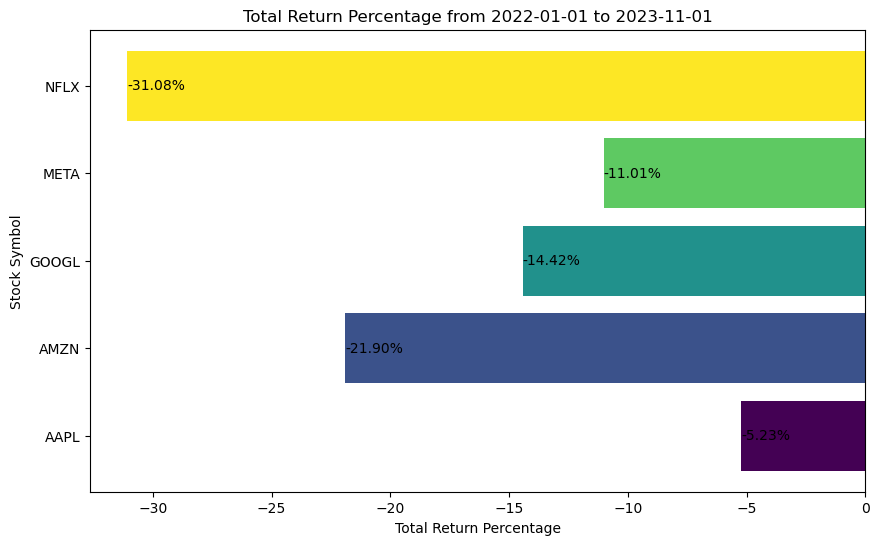

In [28]:
total_return_percentage = maang_cum_returns.iloc[-1] * 100 

# Set colors based on viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(total_return_percentage)))

plt.figure(figsize=(10, 6))
bars = plt.barh(total_return_percentage.index, total_return_percentage.values, color=colors)
plt.title('Total Return Percentage from {} to {}'.format(start_date, end_date))
plt.xlabel('Total Return Percentage')
plt.ylabel('Stock Symbol')

for bar, value in zip(bars, total_return_percentage.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center')

plt.show()

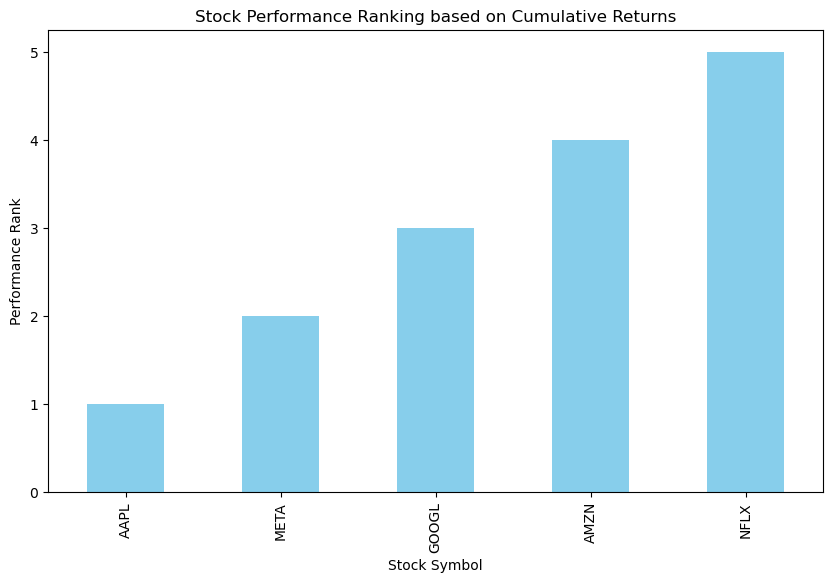

In [29]:
maang_cum_returns = (1 + maang_returns).cumprod()

final_cum_returns = maang_cum_returns.iloc[-1]

ranked_stocks = final_cum_returns.rank(ascending=False)

plt.figure(figsize=(10, 6))
ranked_stocks.sort_values().plot(kind='bar', color='skyblue')
plt.title('Stock Performance Ranking based on Cumulative Returns')
plt.xlabel('Stock Symbol')
plt.ylabel('Performance Rank')
plt.show()
